In [1]:
import pandas as pd
import numpy as np
from matplotlib import rc
from matplotlib import pyplot as plt
import seaborn as sns
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False


df2016 = pd.read_csv('GP_2016_AQ.csv',index_col=0)
health_16 = pd.read_csv('16health.csv')
df2016.insert(28, '건강한정도', health_16['건강한정도'])

df2017 = pd.read_csv('GP_2017_AQ.csv',index_col=0)
health_17 = pd.read_csv('17health.csv')
df2017.insert(28, '건강한정도', health_17['건강한정도'])

df2018 = pd.read_csv('GP_2018_AQ.csv',index_col=0)
health_18 = pd.read_csv('18health.csv')
df2018.insert(28, '건강한정도', health_18['건강한정도'])

df = pd.concat([df2016, df2017, df2018])

---

# 건강 변수 하나로 (군집화 or 차원축소)

In [2]:
health_cols = df.columns[-6:-1]
# Index(['건강한정도', '운동시간(주)', '수면시간(일)', '흡연여부', '음주빈도'], dtype='object')

In [3]:
health_df = df[health_cols]

In [4]:
for col in health_cols:
    print(df[col].value_counts())

4    25127
3    12666
5    11421
2     4526
1      703
Name: 건강한정도, dtype: int64
0      12097
1      10381
2       7292
3       6827
5       5053
4       3623
7       2458
6       2172
10      1892
8       1072
14       405
12       379
15       221
9        160
20       134
30        56
21        39
18        34
16        31
11        22
40        22
13        16
25        10
28         8
24         7
35         6
50         3
60         3
27         3
42         2
48         2
22         2
17         2
23         1
67         1
36         1
100        1
46         1
26         1
70         1
75         1
90         1
Name: 운동시간(주), dtype: int64
7     19267
6     17289
8      9623
5      5429
4      1141
9      1063
10      383
3       129
12       39
1        32
2        21
11       17
14        4
15        2
13        1
20        1
16        1
0         1
Name: 수면시간(일), dtype: int64
2    44175
1    10268
Name: 흡연여부, dtype: int64
3    21316
4    16241
1     8607
2     5366
5     2465

In [5]:
health_df.describe()

,건강한정도,운동시간(주),수면시간(일),흡연여부,음주빈도
count,54443.000000,54443.000000,54443.000000,54443.000000,54443.000000
mean,3.772129,3.078100,6.648127,1.811399,2.998806
std,0.916112,3.573086,1.096884,0.391195,1.133327
min,1.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,1.000000,6.000000,2.000000,2.000000
50%,4.000000,2.000000,7.000000,2.000000,3.000000
75%,4.000000,5.000000,7.000000,2.000000,4.000000
max,5.000000,100.000000,20.000000,2.000000,6.000000


In [6]:
# plt.hist(health_df['운동시간(주)'])
# plt.hist(health_df['수면시간(일)'])
# plt.hist(health_df['음주빈도'])

1.  Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaled_health_df = pd.DataFrame()

In [8]:
scaled_health_df['건강한정도'] = list(health_df['건강한정도'])

In [9]:
scaler = StandardScaler()

scaled = scaler.fit_transform(health_df[['운동시간(주)']])

In [10]:
scaled_health_df['운동시간'] = np.ravel(scaled)

In [11]:
scaler = StandardScaler()
scaled = scaler.fit_transform(health_df[['수면시간(일)']])
scaled_health_df['수면시간'] = np.ravel(scaled)

In [12]:
# scaler = StandardScaler()
# scaled = scaler.fit_transform(health_df[['흡연여부']])
# scaled_health_df['흡연여부'] = np.ravel(scaled)

In [13]:
scaled_health_df['흡연여부'] = list(health_df['흡연여부'])

In [14]:
scaler = StandardScaler()
scaled = scaler.fit_transform(health_df[['음주빈도']])
scaled_health_df['음주빈도'] = np.ravel(scaled)

In [15]:
scaled_health_df

,건강한정도,운동시간,수면시간,흡연여부,음주빈도
0,3,-0.581603,0.320796,2,-1.763679
1,3,-0.581603,-0.590886,2,-1.763679
2,3,-0.861476,0.320796,2,0.001053
3,4,-0.581603,1.232477,2,0.001053
4,4,0.258015,0.320796,2,0.001053
...,...,...,...,...,...
54438,4,0.817760,0.320796,1,0.001053
54439,3,-0.861476,1.232477,2,0.883420
54440,5,-0.301731,1.232477,1,1.765786
54441,3,-0.581603,-2.414249,1,-1.763679


2. PCA (시도)

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_trans = pca.fit_transform(scaled_health_df)

scaled_health_df['pca_x'] = pca_trans[:, 0]
scaled_health_df['pca_y'] = pca_trans[:, 1]

scaled_health_df

,건강한정도,운동시간,수면시간,흡연여부,음주빈도,pca_x,pca_y
0,3,-0.581603,0.320796,2,-1.763679,-1.332975,1.333648
1,3,-0.581603,-0.590886,2,-1.763679,-1.633557,0.643083
2,3,-0.861476,0.320796,2,0.001053,-0.910179,0.275073
3,4,-0.581603,1.232477,2,0.001053,0.111268,1.054811
4,4,0.258015,0.320796,2,0.001053,0.399333,0.249439
...,...,...,...,...,...,...,...
54438,4,0.817760,0.320796,1,0.001053,0.830188,0.102155
54439,3,-0.861476,1.232477,2,0.883420,-0.300091,0.417217
54440,5,-0.301731,1.232477,1,1.765786,1.489568,-0.023605
54441,3,-0.581603,-2.414249,1,-1.763679,-2.196297,-0.808793


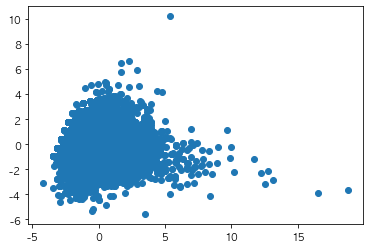

In [17]:
plt.scatter(scaled_health_df['pca_x'], scaled_health_df['pca_y'])

> 군집화 안될듯..?

In [18]:
scaled_health_df = scaled_health_df.iloc[:,:-2]
scaled_health_df

,건강한정도,운동시간,수면시간,흡연여부,음주빈도
0,3,-0.581603,0.320796,2,-1.763679
1,3,-0.581603,-0.590886,2,-1.763679
2,3,-0.861476,0.320796,2,0.001053
3,4,-0.581603,1.232477,2,0.001053
4,4,0.258015,0.320796,2,0.001053
...,...,...,...,...,...
54438,4,0.817760,0.320796,1,0.001053
54439,3,-0.861476,1.232477,2,0.883420
54440,5,-0.301731,1.232477,1,1.765786
54441,3,-0.581603,-2.414249,1,-1.763679


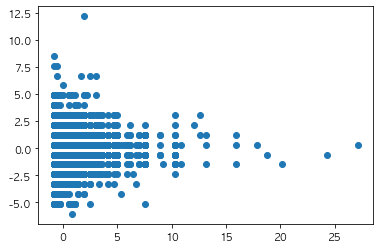

In [19]:
plt.scatter(scaled_health_df['운동시간'], scaled_health_df['수면시간'])

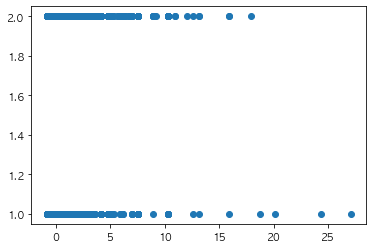

In [20]:
plt.scatter(scaled_health_df['운동시간'], scaled_health_df['흡연여부'])

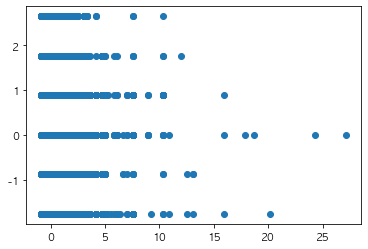

In [21]:
plt.scatter(scaled_health_df['운동시간'], scaled_health_df['음주빈도'])

3. 군집화 : kmeans

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300)
kmeans.fit(scaled_health_df)

KMeans(n_clusters=3)

In [24]:
scaled_health_df['건강_군집'] = kmeans.labels_

In [25]:
pd.options.display.float_format = '{:.4f}'.format

In [26]:
scaled_health_df.describe()

,건강한정도,운동시간,수면시간,흡연여부,음주빈도,건강_군집
count,54443.0000,54443.0000,54443.0000,54443.0000,54443.0000,54443.0000
mean,3.7721,-0.0000,-0.0000,1.8114,-0.0000,0.9769
std,0.9161,1.0000,1.0000,0.3912,1.0000,0.6709
min,1.0000,-0.8615,-6.0610,1.0000,-1.7637,0.0000
25%,3.0000,-0.5816,-0.5909,2.0000,-0.8813,1.0000
50%,4.0000,-0.3017,0.3208,2.0000,0.0011,1.0000
75%,4.0000,0.5379,0.3208,2.0000,0.8834,1.0000
max,5.0000,27.1258,12.1727,2.0000,2.6482,2.0000


In [27]:
scaled_health_df.iloc[:,-1]

0        0
1        0
2        1
3        1
4        1
        ..
54438    2
54439    1
54440    1
54441    0
54442    1
Name: 건강_군집, Length: 54443, dtype: int32

In [28]:
score_samples = silhouette_samples(scaled_health_df.iloc[:,:-1], scaled_health_df.iloc[:,-1])

In [29]:
scaled_health_df['sil_coeff'] = score_samples

In [30]:
average_score = silhouette_score(scaled_health_df.iloc[:,:-2], scaled_health_df.iloc[:,-2])
print(average_score)

0.2089557412690998


In [31]:
scaled_health_df.groupby('건강_군집')['sil_coeff'].mean()

건강_군집
0   0.2384
1   0.2255
2   0.1337
Name: sil_coeff, dtype: float64

> 적절한 군집 생성은 안되는 것 같은데.. 전체 평균 실루엣 계수가 계속 많이 낮게 나옴

5. 건강한정도 (본인 체감 매우 1 건강하지 않음~매우 건강함 5) 임의로 구분해서 현황 파악

In [86]:
health_df[health_df['건강한정도']==1].describe()

,건강한정도,운동시간(주),수면시간(일),흡연여부,음주빈도
count,703.0000,703.0000,703.0000,703.0000,703.0000
mean,1.0000,3.1124,6.5220,1.7639,2.7909
std,0.0000,4.3050,1.3657,0.4250,1.2922
min,1.0000,0.0000,1.0000,1.0000,1.0000
25%,1.0000,1.0000,6.0000,2.0000,2.0000
50%,1.0000,2.0000,7.0000,2.0000,3.0000
75%,1.0000,5.0000,7.0000,2.0000,4.0000
max,1.0000,48.0000,12.0000,2.0000,6.0000


In [87]:
health_df[health_df['건강한정도']==2].describe()

,건강한정도,운동시간(주),수면시간(일),흡연여부,음주빈도
count,4526.0000,4526.0000,4526.0000,4526.0000,4526.0000
mean,2.0000,2.0753,6.3040,1.8137,2.8361
std,0.0000,2.8626,1.3129,0.3894,1.1958
min,2.0000,0.0000,1.0000,1.0000,1.0000
25%,2.0000,0.0000,5.0000,2.0000,2.0000
50%,2.0000,1.0000,6.0000,2.0000,3.0000
75%,2.0000,3.0000,7.0000,2.0000,4.0000
max,2.0000,40.0000,12.0000,2.0000,6.0000


In [88]:
health_df[health_df['건강한정도']==3].describe()

,건강한정도,운동시간(주),수면시간(일),흡연여부,음주빈도
count,12666.0000,12666.0000,12666.0000,12666.0000,12666.0000
mean,3.0000,2.4385,6.5511,1.8120,2.9502
std,0.0000,3.3647,1.1490,0.3907,1.1491
min,3.0000,0.0000,1.0000,1.0000,1.0000
25%,3.0000,0.0000,6.0000,2.0000,2.0000
50%,3.0000,1.0000,7.0000,2.0000,3.0000
75%,3.0000,3.0000,7.0000,2.0000,4.0000
max,3.0000,100.0000,15.0000,2.0000,6.0000


In [89]:
health_df[health_df['건강한정도']==4].describe()

,건강한정도,운동시간(주),수면시간(일),흡연여부,음주빈도
count,25127.0000,25127.0000,25127.0000,25127.0000,25127.0000
mean,4.0000,3.1362,6.7073,1.8209,3.0398
std,0.0000,3.3984,1.0231,0.3834,1.0986
min,4.0000,0.0000,1.0000,1.0000,1.0000
25%,4.0000,1.0000,6.0000,2.0000,3.0000
50%,4.0000,2.0000,7.0000,2.0000,3.0000
75%,4.0000,5.0000,7.0000,2.0000,4.0000
max,4.0000,75.0000,16.0000,2.0000,6.0000


/opt/homebrew/Caskroom/miniforge/base/envs/multi_crawling/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='운동시간(주)'>

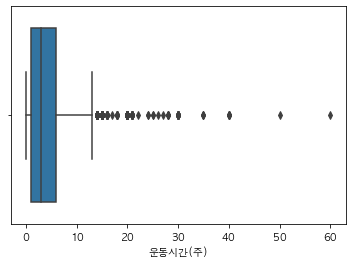

In [100]:
sns.boxplot(health_df[health_df['건강한정도']==5]['운동시간(주)'])

# 건강 지표는 줄일 수 없음.. 
# 건강한정도(주관적 지표)와 운동시간/수면시간/흡연여부/음주빈도(객관적 지표) 둘 다 군집화도 어렵고 PCA도 어려움.